In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, confusion_matrix

pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('loan.csv', dtype={19:'str', 55:'str'})

In [4]:
df.iloc[:,9].head()

0    B2
1    C4
2    C5
3    C1
4    B5
Name: sub_grade, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [6]:
df['last_pymnt_amnt'].value_counts()

0.00        17673
327.34       2098
318.79       1791
312.86       1450
392.81       1402
            ...  
7207.12         1
13462.40        1
3486.10         1
1267.79         1
3655.51         1
Name: last_pymnt_amnt, Length: 232451, dtype: int64

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Count'>

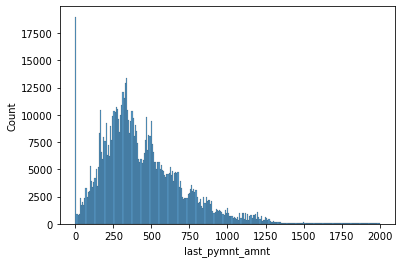

In [7]:
sns.histplot(df['last_pymnt_amnt'], binrange=[0,2000])

In [8]:
df.iloc[:,56].value_counts()

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

In [9]:
df.loc[:,'loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [9]:
# use custom function to classify instead
# df = pd.get_dummies(df, columns=['loan_status'])

In [10]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Issued,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,0,0,0,0,0,1,0,0,0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,1,0,0,0,0,0,0,0,0,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,0,0,0,0,0,1,0,0,0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,0,0,0,0,0,1,0,0,0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,0,1,0,0,0,0,0,0,0,0
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,0,1,0,0,0,0,0,0,0,0
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,0,1,0,0,0,0,0,0,0,0
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,0,1,0,0,0,0,0,0,0,0


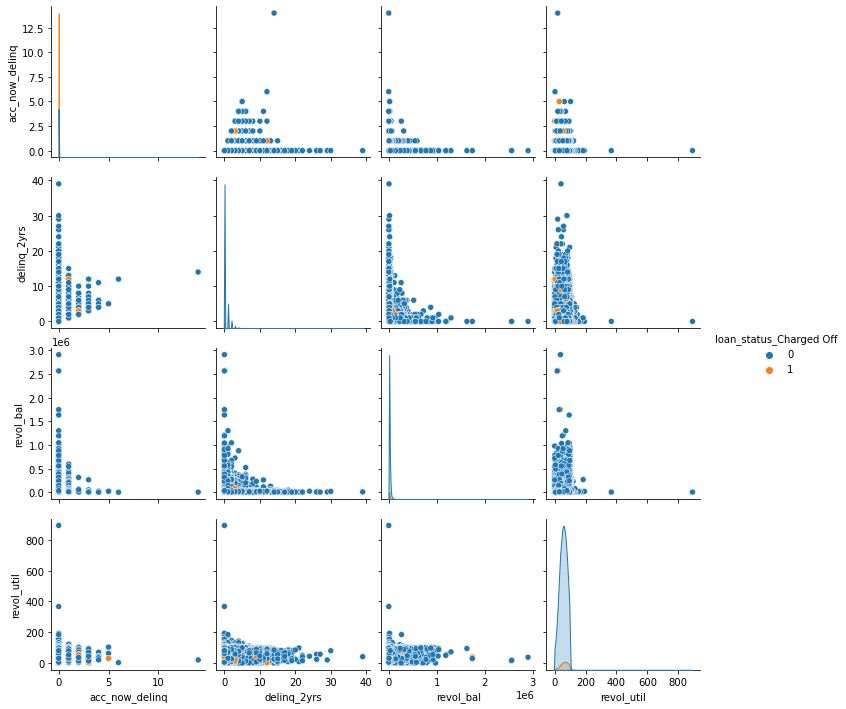

In [65]:
sns.pairplot(data=df[['acc_now_delinq', 'delinq_2yrs', 'revol_bal', 'revol_util', 'loan_status_Charged Off']],\
             vars=df[['acc_now_delinq', 'delinq_2yrs', 'revol_bal', 'revol_util']], hue='loan_status_Charged Off')

In [24]:
df['last_pymnt_d'].value_counts()

Jan-2016    470150
Dec-2015    150861
Oct-2015     16000
Jul-2015     14483
Nov-2015     13981
             ...  
Jun-2008        20
Mar-2008        18
Jan-2008        11
Feb-2008         8
Dec-2007         2
Name: last_pymnt_d, Length: 98, dtype: int64

In [26]:
df[df['loan_status_Current'] == 1][['last_pymnt_d', 'last_pymnt_amnt', 'installment']].head()

,last_pymnt_d,last_pymnt_amnt,installment
4,Jan-2016,67.79,67.79
6,Jan-2016,170.08,170.08
32,Jan-2016,242.97,242.97
39,Jan-2016,282.44,282.44
61,Jan-2016,223.74,223.74


In [19]:
df[df['loan_status_Default'] == 1][['last_pymnt_d', 'last_pymnt_amnt', 'installment']].head(10)

,last_pymnt_d,last_pymnt_amnt,installment
318,Aug-2015,449.97,449.97
7620,Aug-2015,497.43,497.43
11759,Aug-2015,136.16,136.16
13439,Aug-2015,432.09,432.09
13856,Aug-2015,121.57,121.57
17159,Aug-2015,237.74,229.74
18912,Aug-2015,621.77,621.77
21228,Aug-2015,733.45,357.78
23773,Aug-2015,89.22,89.22
46013,Aug-2015,327.89,327.89


In [21]:
df[df['loan_status_Charged Off'] == 1][['last_pymnt_d', 'last_pymnt_amnt', 'installment']].head(10)

,last_pymnt_d,last_pymnt_amnt,installment
1,Apr-2013,119.66,59.83
8,Apr-2012,152.39,152.39
9,Nov-2012,121.45,121.45
12,Jul-2012,305.38,305.38
14,Oct-2013,325.74,325.74
21,Sep-2013,701.73,701.73
24,Oct-2012,198.46,198.46
26,NaN,0.00,514.64
27,Dec-2012,123.65,123.65
46,Aug-2014,158.77,158.77


In [27]:
df[df['loan_status_Current'] == 1]['last_pymnt_d'].value_counts()

Jan-2016    462829
Dec-2015    130624
Name: last_pymnt_d, dtype: int64

In [28]:
df[df['loan_status_Default'] == 1]['last_pymnt_d'].value_counts()

Aug-2015    999
Sep-2015    203
Jan-2016      6
Jun-2015      1
May-2015      1
Name: last_pymnt_d, dtype: int64

In [33]:
df[df['loan_status_Current']==1]['last_pymnt_amnt'].describe()

count    601779.000000
mean        448.958775
std         404.577772
min           0.000000
25%         263.930000
50%         387.150000
75%         581.580000
max       35330.490000
Name: last_pymnt_amnt, dtype: float64

In [34]:
df[df['loan_status_Default']==1]['last_pymnt_amnt'].describe()

count    1219.000000
mean      466.433306
std       317.609299
min         0.000000
25%       289.005000
50%       404.270000
75%       586.680000
max      6960.700000
Name: last_pymnt_amnt, dtype: float64

In [35]:
df[df['loan_status_Charged Off']==1]['last_pymnt_amnt'].describe()

count    45248.000000
mean       454.690175
std        656.652819
min          0.000000
25%        235.830000
50%        374.985000
75%        568.552500
max      34833.350000
Name: last_pymnt_amnt, dtype: float64

In [36]:
df[df['loan_status_Fully Paid']==1]['last_pymnt_amnt'].describe()

count    207723.000000
mean       7770.242299
std        7508.104201
min           0.000000
25%        1555.190000
50%        5749.590000
75%       11663.590000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64

In [55]:
df['loan_status_Charged Off']

0         0
1         1
2         0
3         0
4         0
         ..
887374    0
887375    0
887376    0
887377    0
887378    0
Name: loan_status_Charged Off, Length: 887379, dtype: uint8

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
df['loan_status_Charged Off'].mean()

0.050990613931589546

In [45]:
X = df.iloc[:,[2, 3, 4, 6, 7]]

In [46]:
y = df['loan_status_Charged Off']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(709903, 5)

In [49]:
X_test.shape

(177476, 5)

In [62]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [63]:
df.iloc[:,[2, 3, 4, 6, 7]].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
0,5000.0,5000.0,4975.0,10.65,162.87
1,2500.0,2500.0,2500.0,15.27,59.83
2,2400.0,2400.0,2400.0,15.96,84.33
3,10000.0,10000.0,10000.0,13.49,339.31
4,3000.0,3000.0,3000.0,12.69,67.79


In [58]:
df.iloc[:,28]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
887374     77.0
887375      NaN
887376     84.0
887377      NaN
887378    110.0
Name: mths_since_last_record, Length: 887379, dtype: float64

In [86]:
y_pred = knn.predict_proba(X_test)[:,1] > .13

/Users/manveersadhal/opt/anaconda3/envs/classification/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [87]:
metrics.accuracy_score(y_test, y_pred)

0.8762987671572494

In [88]:
confusion_matrix(y_test, y_pred)

array([[153271,  15196],
       [  6758,   2251]])

/Users/manveersadhal/opt/anaconda3/envs/classification/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


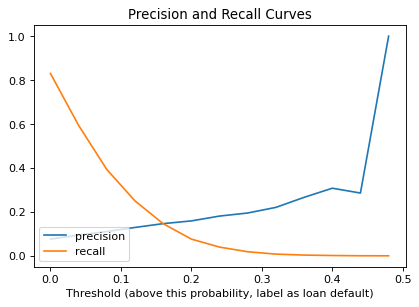

In [89]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [141]:
from sklearn.metrics import roc_auc_score, roc_curve

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

/Users/manveersadhal/opt/anaconda3/envs/classification/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/Users/manveersadhal/opt/anaconda3/envs/classification/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ROC AUC score =  0.6930093105634904


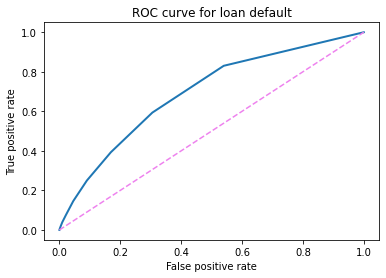

In [94]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for loan default');
print("ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))

In [107]:
mask = (df['loan_status_Charged Off'] == 1)
len(df[mask]['mths_since_last_record'])

45248

In [116]:
df['all_util'].value_counts()

61.0     71
68.0     60
51.0     57
61.3     57
72.0     56
         ..
3.3       1
15.7      1
107.9     1
97.6      1
7.4       1
Name: all_util, Length: 1128, dtype: int64

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Count'>

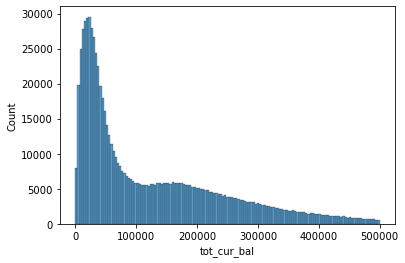

In [115]:
sns.histplot(df['tot_cur_bal'], binrange=[0,500000])

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

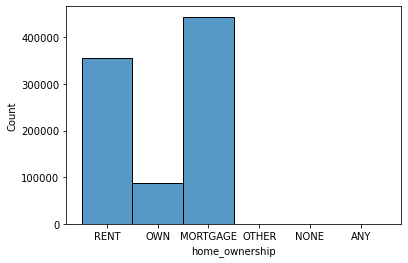

In [119]:
sns.histplot(df['home_ownership'])

In [75]:
df['home_ownership'].value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='mths_since_last_delinq', ylabel='Count'>

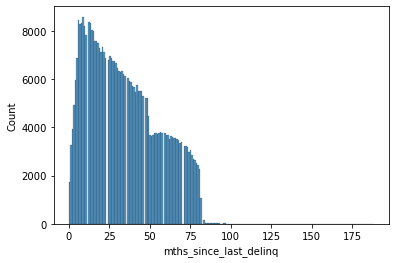

In [122]:
sns.histplot(df['mths_since_last_delinq'])

In [121]:
df['inq_last_6mths'].value_counts()

0.0     497905
1.0     241494
2.0      94117
3.0      37398
4.0      10758
5.0       3985
6.0       1231
7.0        195
8.0        122
9.0         50
10.0        24
11.0        15
12.0        15
15.0         9
13.0         6
14.0         6
18.0         4
16.0         3
17.0         2
24.0         2
19.0         2
32.0         1
33.0         1
31.0         1
28.0         1
25.0         1
27.0         1
20.0         1
Name: inq_last_6mths, dtype: int64

In [10]:
smaller_df = df[['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'grade', 'inq_last_6mths',\
                 'installment', 'int_rate', 'loan_status', 'open_acc', 'pub_rec', 'revol_util', 'term',\
                 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'home_ownership']].copy()

In [11]:
smaller_df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [12]:
def classify_loan_status(loan_status):
    # consider loans that are completed
    if loan_status == 'Fully Paid' or loan_status == 'Does not meet the credit policy. Status:Fully Paid':
        return int(0)
    elif loan_status == 'Charged Off' or loan_status == 'Default' or loan_status == 'Does not meet the credit policy. Status:Charged Off':
        return int(1)
    else:
        return np.nan

In [13]:
smaller_df['loan_status'] = smaller_df['loan_status'].apply(classify_loan_status)

In [14]:
smaller_df.head()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,grade,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,revol_util,term,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,home_ownership
0,24000.0,0.0,0.0,27.65,B,1.0,162.87,10.65,0.0,3.0,0.0,83.7,36 months,9.0,0.0,NaN,NaN,RENT
1,30000.0,0.0,0.0,1.00,C,5.0,59.83,15.27,1.0,3.0,0.0,9.4,60 months,4.0,0.0,NaN,NaN,RENT
2,12252.0,0.0,0.0,8.72,C,2.0,84.33,15.96,0.0,2.0,0.0,98.5,36 months,10.0,0.0,NaN,NaN,RENT
3,49200.0,0.0,0.0,20.00,C,1.0,339.31,13.49,0.0,10.0,0.0,21.0,36 months,37.0,0.0,NaN,NaN,RENT
4,80000.0,0.0,0.0,17.94,B,0.0,67.79,12.69,NaN,15.0,0.0,53.9,60 months,38.0,0.0,NaN,NaN,RENT


In [16]:
smaller_df.dropna(subset=['loan_status'], inplace=True)

In [17]:
smaller_df.head()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,grade,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,revol_util,term,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,home_ownership
0,24000.0,0.0,0.0,27.65,B,1.0,162.87,10.65,0.0,3.0,0.0,83.7,36 months,9.0,0.0,NaN,NaN,RENT
1,30000.0,0.0,0.0,1.00,C,5.0,59.83,15.27,1.0,3.0,0.0,9.4,60 months,4.0,0.0,NaN,NaN,RENT
2,12252.0,0.0,0.0,8.72,C,2.0,84.33,15.96,0.0,2.0,0.0,98.5,36 months,10.0,0.0,NaN,NaN,RENT
3,49200.0,0.0,0.0,20.00,C,1.0,339.31,13.49,0.0,10.0,0.0,21.0,36 months,37.0,0.0,NaN,NaN,RENT
5,36000.0,0.0,0.0,11.20,A,3.0,156.46,7.90,0.0,9.0,0.0,28.3,36 months,12.0,0.0,NaN,NaN,RENT


In [18]:
def classify_home_ownership(ownership):
    if ownership == 'RENT':
        return int(0)
    elif ownership == 'MORTGAGE' or ownership == 'OWN':
        return int(1)
    else:
        return np.nan

In [19]:
smaller_df['home_ownership'] = smaller_df['home_ownership'].apply(classify_home_ownership)

In [20]:
smaller_df.dropna(subset=['home_ownership'], inplace=True)

In [21]:
smaller_df.head()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,grade,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,revol_util,term,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,home_ownership
0,24000.0,0.0,0.0,27.65,B,1.0,162.87,10.65,0.0,3.0,0.0,83.7,36 months,9.0,0.0,NaN,NaN,0.0
1,30000.0,0.0,0.0,1.00,C,5.0,59.83,15.27,1.0,3.0,0.0,9.4,60 months,4.0,0.0,NaN,NaN,0.0
2,12252.0,0.0,0.0,8.72,C,2.0,84.33,15.96,0.0,2.0,0.0,98.5,36 months,10.0,0.0,NaN,NaN,0.0
3,49200.0,0.0,0.0,20.00,C,1.0,339.31,13.49,0.0,10.0,0.0,21.0,36 months,37.0,0.0,NaN,NaN,0.0
5,36000.0,0.0,0.0,11.20,A,3.0,156.46,7.90,0.0,9.0,0.0,28.3,36 months,12.0,0.0,NaN,NaN,0.0


In [22]:
smaller_df.shape

(256711, 18)

In [23]:
np.mean(smaller_df['loan_status'])

0.1837942277502717

In [24]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256711 entries, 0 to 887371
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  256711 non-null  float64
 1   collections_12_mths_ex_med  256572 non-null  float64
 2   delinq_2yrs                 256686 non-null  float64
 3   dti                         256711 non-null  float64
 4   grade                       256711 non-null  object 
 5   inq_last_6mths              256686 non-null  float64
 6   installment                 256711 non-null  float64
 7   int_rate                    256711 non-null  float64
 8   loan_status                 256711 non-null  float64
 9   open_acc                    256686 non-null  float64
 10  pub_rec                     256686 non-null  float64
 11  revol_util                  256477 non-null  float64
 12  term                        256711 non-null  object 
 13  total_acc     

In [25]:
smaller_df.reset_index()

,index,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,grade,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,revol_util,term,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,home_ownership
0,0,24000.0,0.0,0.0,27.65,B,1.0,162.87,10.65,0.0,3.0,0.0,83.7,36 months,9.0,0.0,NaN,NaN,0.0
1,1,30000.0,0.0,0.0,1.00,C,5.0,59.83,15.27,1.0,3.0,0.0,9.4,60 months,4.0,0.0,NaN,NaN,0.0
2,2,12252.0,0.0,0.0,8.72,C,2.0,84.33,15.96,0.0,2.0,0.0,98.5,36 months,10.0,0.0,NaN,NaN,0.0
3,3,49200.0,0.0,0.0,20.00,C,1.0,339.31,13.49,0.0,10.0,0.0,21.0,36 months,37.0,0.0,NaN,NaN,0.0
4,5,36000.0,0.0,0.0,11.20,A,3.0,156.46,7.90,0.0,9.0,0.0,28.3,36 months,12.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256706,887351,48000.0,0.0,0.0,36.93,D,0.0,147.64,15.99,1.0,13.0,0.0,63.4,36 months,45.0,0.0,0.0,207975.0,1.0
256707,887364,54000.0,0.0,1.0,13.22,A,0.0,327.95,6.03,0.0,9.0,0.0,25.8,36 months,21.0,0.0,0.0,24696.0,0.0
256708,887366,27000.0,0.0,0.0,18.58,D,1.0,220.37,16.49,0.0,3.0,0.0,97.6,36 months,4.0,0.0,0.0,8357.0,0.0
256709,887369,50000.0,0.0,0.0,12.63,B,0.0,126.59,8.67,0.0,11.0,1.0,5.6,36 months,30.0,0.0,0.0,18979.0,1.0


In [26]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256711 entries, 0 to 887371
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  256711 non-null  float64
 1   collections_12_mths_ex_med  256572 non-null  float64
 2   delinq_2yrs                 256686 non-null  float64
 3   dti                         256711 non-null  float64
 4   grade                       256711 non-null  object 
 5   inq_last_6mths              256686 non-null  float64
 6   installment                 256711 non-null  float64
 7   int_rate                    256711 non-null  float64
 8   loan_status                 256711 non-null  float64
 9   open_acc                    256686 non-null  float64
 10  pub_rec                     256686 non-null  float64
 11  revol_util                  256477 non-null  float64
 12  term                        256711 non-null  object 
 13  total_acc     

In [27]:
smaller_df.corr()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,revol_util,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,home_ownership
annual_inc,1.000000,0.003779,0.050239,-0.170119,0.050228,0.330060,-0.025639,-0.058751,0.142054,-0.018654,0.024493,0.207940,0.016554,0.001939,0.439149,0.154416
collections_12_mths_ex_med,0.003779,1.000000,0.046592,0.005244,-0.000578,-0.000255,0.028209,0.007782,0.019539,0.025349,-0.024831,0.018437,0.020821,0.004435,0.000886,0.002474
delinq_2yrs,0.050239,0.046592,1.000000,-0.001133,0.021619,0.019769,0.093550,0.017401,0.056607,-0.004611,-0.016548,0.126849,0.113143,-0.000592,0.063139,0.044458
dti,-0.170119,0.005244,-0.001133,1.000000,-0.007573,0.055317,0.172635,0.112255,0.310772,-0.032932,0.220077,0.234671,0.009100,-0.003858,-0.017429,0.007525
inq_last_6mths,0.050228,-0.000578,0.021619,-0.007573,1.000000,0.008637,0.203728,0.062013,0.102263,0.044363,-0.086197,0.125195,-0.003850,0.001205,0.059964,0.057210
installment,0.330060,-0.000255,0.019769,0.055317,0.008637,1.000000,0.201804,0.042567,0.198705,-0.064462,0.130263,0.215222,0.016120,-0.001907,0.287565,0.149189
int_rate,-0.025639,0.028209,0.093550,0.172635,0.203728,0.201804,1.000000,0.239664,0.040193,0.082856,0.340882,-0.010290,0.031913,0.000764,-0.103415,-0.060895
loan_status,-0.058751,0.007782,0.017401,0.112255,0.062013,0.042567,0.239664,1.000000,0.010646,0.003461,0.096617,-0.032901,0.006046,-0.001607,-0.076035,-0.050032
open_acc,0.142054,0.019539,0.056607,0.310772,0.102263,0.198705,0.040193,0.010646,1.000000,-0.011478,-0.109904,0.673415,0.019064,-0.001022,0.234745,0.139060
pub_rec,-0.018654,0.025349,-0.004611,-0.032932,0.044363,-0.064462,0.082856,0.003461,-0.011478,1.000000,-0.064160,0.030980,0.004068,0.001848,-0.079230,0.008579


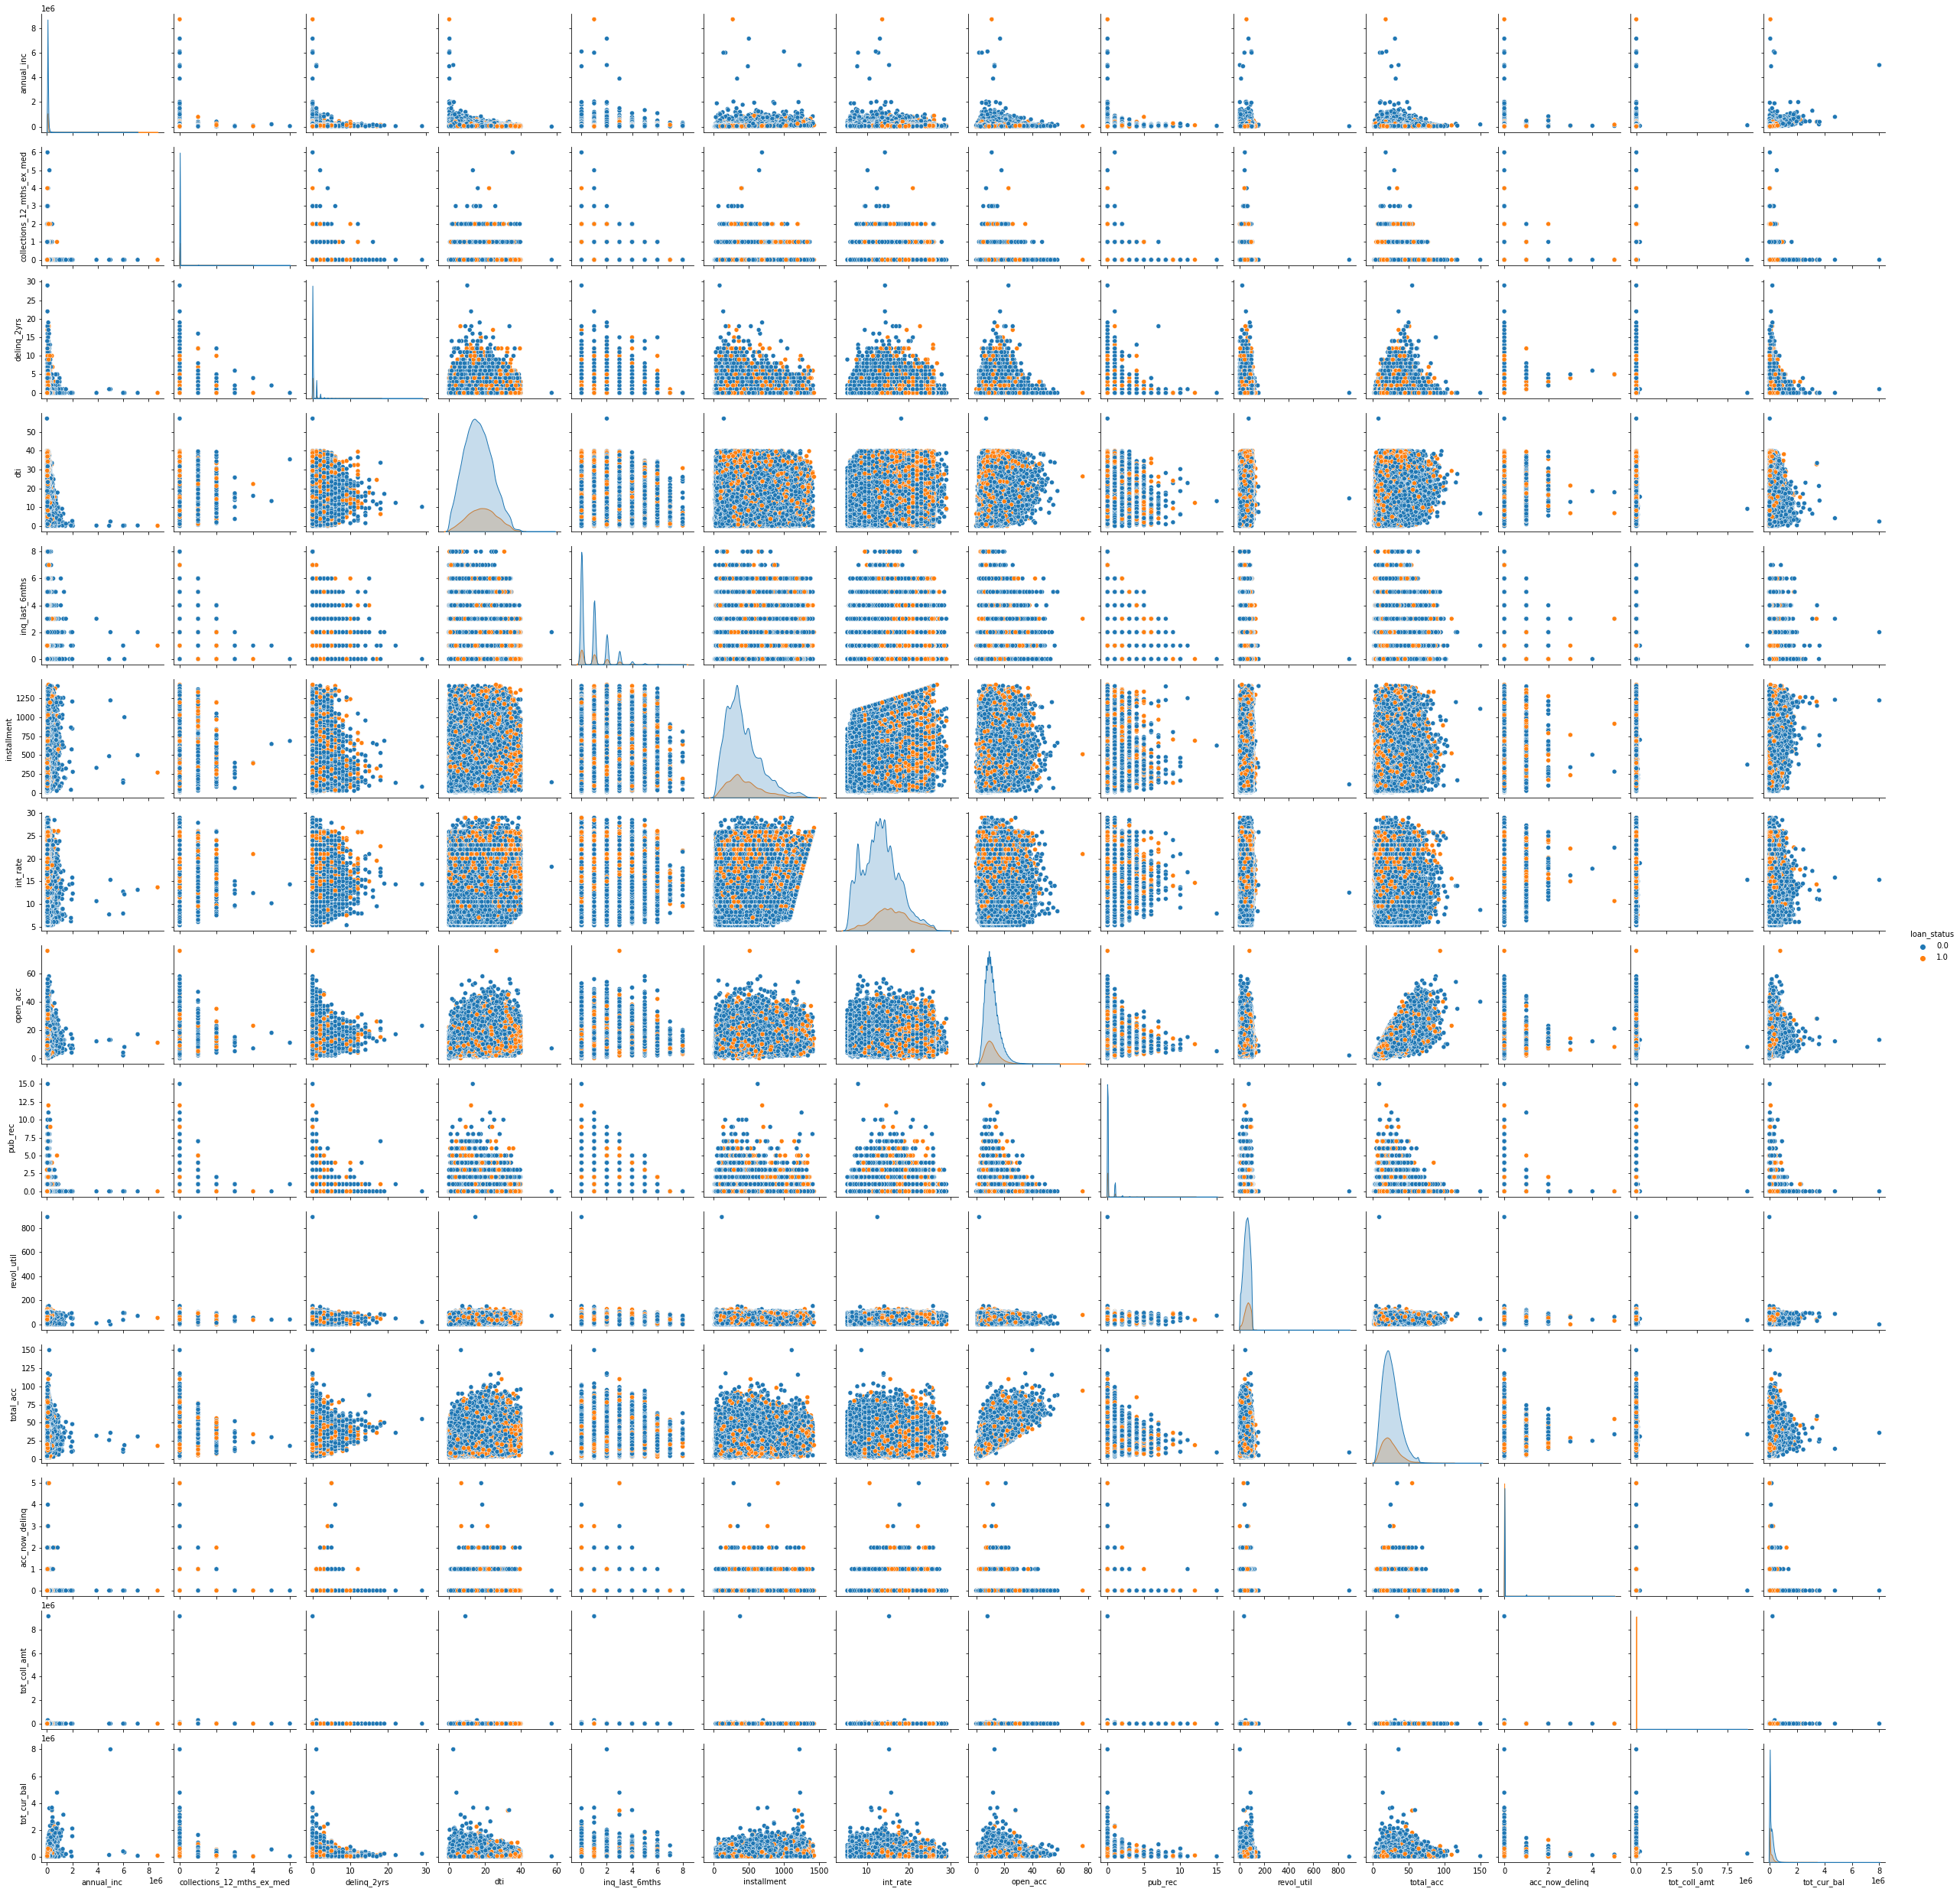

In [150]:
sns.pairplot(smaller_df, hue='loan_status')

In [28]:
smaller_df.corr().loc[:,'loan_status'].abs().sort_values(ascending=False)

loan_status                   1.000000
int_rate                      0.239664
dti                           0.112255
revol_util                    0.096617
tot_cur_bal                   0.076035
inq_last_6mths                0.062013
annual_inc                    0.058751
home_ownership                0.050032
installment                   0.042567
total_acc                     0.032901
delinq_2yrs                   0.017401
open_acc                      0.010646
collections_12_mths_ex_med    0.007782
acc_now_delinq                0.006046
pub_rec                       0.003461
tot_coll_amt                  0.001607
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

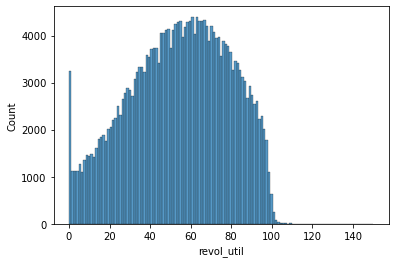

In [29]:
sns.histplot(smaller_df['revol_util'], binrange=[0,150])

In [30]:
#drop 199 rows with NA values for revol_util
smaller_df.dropna(axis=0, subset=['revol_util'], inplace=True)

In [31]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256477 entries, 0 to 887371
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  256477 non-null  float64
 1   collections_12_mths_ex_med  256366 non-null  float64
 2   delinq_2yrs                 256477 non-null  float64
 3   dti                         256477 non-null  float64
 4   grade                       256477 non-null  object 
 5   inq_last_6mths              256477 non-null  float64
 6   installment                 256477 non-null  float64
 7   int_rate                    256477 non-null  float64
 8   loan_status                 256477 non-null  float64
 9   open_acc                    256477 non-null  float64
 10  pub_rec                     256477 non-null  float64
 11  revol_util                  256477 non-null  float64
 12  term                        256477 non-null  object 
 13  total_acc     

In [32]:
smaller_df.dropna(axis=0, subset=['collections_12_mths_ex_med'], inplace=True)

In [33]:
smaller_df['term'].value_counts()

 36 months    199285
 60 months     57081
Name: term, dtype: int64

In [34]:
smaller_df['grade'].value_counts()

B    76498
C    66174
A    42363
D    41391
E    19857
F     7951
G     2132
Name: grade, dtype: int64

In [35]:
smaller_df = pd.get_dummies(smaller_df, columns = ['term', 'grade'], drop_first=True)

In [36]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256366 entries, 0 to 887371
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  256366 non-null  float64
 1   collections_12_mths_ex_med  256366 non-null  float64
 2   delinq_2yrs                 256366 non-null  float64
 3   dti                         256366 non-null  float64
 4   inq_last_6mths              256366 non-null  float64
 5   installment                 256366 non-null  float64
 6   int_rate                    256366 non-null  float64
 7   loan_status                 256366 non-null  float64
 8   open_acc                    256366 non-null  float64
 9   pub_rec                     256366 non-null  float64
 10  revol_util                  256366 non-null  float64
 11  total_acc                   256366 non-null  float64
 12  acc_now_delinq              256366 non-null  float64
 13  tot_coll_amt  

In [238]:
# smaller_df['last_pmt_installment_ratio'] = smaller_df['last_pymnt_amnt'] / smaller_df['installment']

<AxesSubplot:xlabel='last_pmt_installment_ratio', ylabel='Count'>

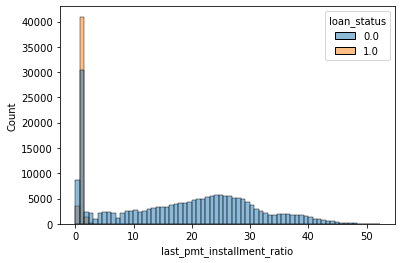

In [240]:
# sns.histplot(data=smaller_df, x='last_pmt_installment_ratio', hue='loan_status')

In [37]:
smaller_df.to_csv('loans_clean.csv')

In [241]:
X = smaller_df[['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'int_rate', 'open_acc',\
               'pub_rec', 'revol_util', 'total_acc', 'acc_now_delinq', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',\
               'grade_G', 'home_ownership', 'installment']]
y = smaller_df['loan_status']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=50)

In [173]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn.predict_proba(X_test)[:,1] > .5
metrics.accuracy_score(y_test, y_pred)

In [311]:
confusion_matrix(y_test, y_pred)

array([[41531,     3],
       [ 9006,     4]])

In [248]:
from sklearn.model_selection import GridSearchCV

In [331]:
k_range = list(range(25,76))
# weight_options = ['uniform', 'distance']

In [332]:
param_grid = dict(n_neighbors=k_range)

In [333]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='precision')

In [117]:
import warnings
warnings.filterwarnings("ignore")

In [359]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=52),
             param_grid={'n_neighbors': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
                                         35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                                         45, 46, 47, 48, 49, 50, 51, 52, 53, 54, ...]},
             scoring='precision')

In [360]:
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 52}
Best estimator:  KNeighborsClassifier(n_neighbors=52)
Best score:  0.3983333333333333


In [175]:
knn = KNeighborsClassifier(n_neighbors=52, weights='uniform')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=52)

In [176]:
f1_score(y_test, knn.predict(X_test_scaled), average='weighted')

0.8489432478607672

In [177]:
f1_score(y_test, knn.predict(X_test_scaled))

0.5115460743347261

In [178]:
precision_score(y_test, knn.predict(X_test_scaled), average='weighted')

0.8609740634808625

In [179]:
precision_score(y_test, knn.predict(X_test_scaled))

0.7949419002050581

In [180]:
recall_score(y_test, knn.predict(X_test_scaled), average='weighted')

0.8687119465626293

In [181]:
recall_score(y_test, knn.predict(X_test_scaled))

0.3771076523994812

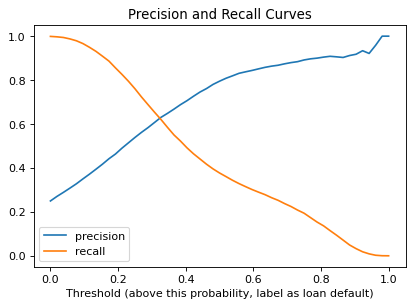

In [182]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.preprocessing import StandardScaler

In [242]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

In [243]:
lm = LogisticRegression(C=1, class_weight='balanced')
lm.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [244]:
lm.score(X_train_scaled, y_train)

0.8494054245770978

In [126]:
X_train_scaled[0]

array([-0.1262505 , -0.07532064,  1.00148533, -1.88503938, -0.79857892,
       -0.84117601, -0.02754121, -0.80694722, -0.32915572, -0.82995313,
       -0.59986898, -0.05282232, -0.53738908, -0.65640786,  1.69590129,
       -0.43749652, -0.2868332 , -0.17710869, -0.08694309, -1.17537507])

In [245]:
for column, coef in zip(X_train.columns, lm.coef_[0]):
    print (f'{column}: {coef}')

annual_inc: -0.15608001230635934
collections_12_mths_ex_med: 0.058218775098097905
delinq_2yrs: 0.05796472162565523
dti: 0.2424399877738096
inq_last_6mths: 0.06456183454866525
installment: 0.6932652632586505
int_rate: 0.7319661687680967
open_acc: 0.05247531973944676
pub_rec: 0.17879689282099126
revol_util: -0.02014158561013307
total_acc: -0.032990343398321624
acc_now_delinq: 0.026115644700388786
term_ 60 months: 0.5876838201804834
grade_B: 0.04244995655709202
grade_C: 0.046056097479522176
grade_D: -0.04514093190666578
grade_E: -0.0856278493374178
grade_F: -0.11362747900319214
grade_G: -0.06876666951623563
home_ownership: -0.016768297307636546
last_pymnt_amnt: -12.158401452257499


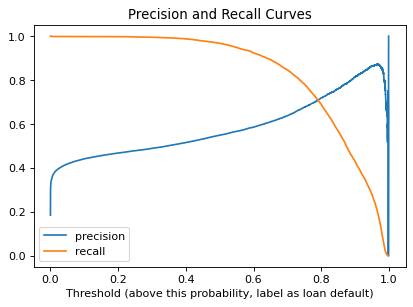

In [246]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_test_scaled)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [247]:
f1_score(y_test, lm.predict(X_test_scaled), average='weighted')

0.8630440421918399

In [248]:
f1_score(y_test, lm.predict(X_test_scaled))

0.7006065349246724

In [249]:
precision_score(y_test, lm.predict(X_test_scaled), average='weighted')

0.9106792080052516

In [250]:
precision_score(y_test, lm.predict(X_test_scaled))

0.5491013923817702

In [251]:
recall_score(y_test, lm.predict(X_test_scaled), average='weighted')

0.8492443498650273

In [252]:
recall_score(y_test, lm.predict(X_test_scaled))

0.9675745784695201

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
random_forest = RandomForestClassifier(n_estimators=100)

In [194]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
random_forest.score(X_test, y_test)

0.9152331973754212

In [196]:
f1_score(y_test, random_forest.predict(X_test), average='weighted')

0.9135413111131366

In [197]:
f1_score(y_test, random_forest.predict(X_test))

0.7557624616782105

In [198]:
precision_score(y_test, random_forest.predict(X_test), average='weighted')

0.9127293939450033

In [199]:
precision_score(y_test, random_forest.predict(X_test))

0.7959818225304951

In [200]:
recall_score(y_test, random_forest.predict(X_test), average='weighted')

0.9152331973754212

In [201]:
recall_score(y_test, random_forest.predict(X_test))

0.719412019022914

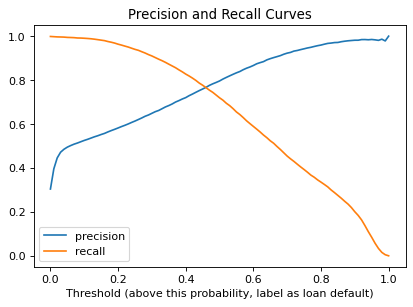

In [202]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, random_forest.predict_proba(X_test)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as loan default)');
plt.title('Precision and Recall Curves');

In [203]:
for feature, importance in zip(random_forest.feature_names_in_, random_forest.feature_importances_):
    print(f'{feature}: {importance}')

annual_inc: 0.053950045656101044
collections_12_mths_ex_med: 0.0006853865087331499
delinq_2yrs: 0.0095873350432327
dti: 0.06341678958807523
inq_last_6mths: 0.017571789549469717
installment: 0.07610189019191353
int_rate: 0.08918702445262866
open_acc: 0.036924838671864385
pub_rec: 0.006954469068451034
revol_util: 0.057396139245270324
total_acc: 0.04426985518710495
acc_now_delinq: 0.00032856588118115827
term_ 60 months: 0.02727347104425593
grade_B: 0.005222672190673552
grade_C: 0.005421768160076964
grade_D: 0.005053174661149124
grade_E: 0.006147522759910757
grade_F: 0.003413633005642339
grade_G: 0.0006243764471531302
home_ownership: 0.007102781044955506
last_pymnt_amnt: 0.4833664716421568


In [341]:
random_forest.feature_importances_

array([0.12829468, 0.00219337, 0.02269351, 0.15005721, 0.03900218,
       0.13971382, 0.12600435, 0.08775269, 0.01486244, 0.14312378,
       0.10653206, 0.00099853, 0.01401774, 0.00381206, 0.00475187,
       0.00573884, 0.00596328, 0.0034267 , 0.00106089])

In [344]:
random_forest.feature_names_in_

array(['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
       'inq_last_6mths', 'installment', 'int_rate', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'acc_now_delinq', 'term_ 60 months',
       'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G'],
      dtype=object)

In [372]:
confusion_matrix(y_test, knn.predict_proba(X_test_scaled)[:,1] > .25)

array([[33517,  8017],
       [ 5282,  3728]])

In [350]:
confusion_matrix(y_test, lm.predict_proba(X_test_scaled)[:,1] > .25)

array([[41534,     0],
       [ 9010,     0]])

In [351]:
confusion_matrix(y_test, random_forest.predict_proba(X_test)[:,1] > .25)

array([[32186,  9348],
       [ 4805,  4205]])

In [204]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])
fpr_lm, tpr_lm, threshold_lm = roc_curve(y_test, lm.predict_proba(X_test_scaled)[:,1])
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])

ROC AUC score (KNN) =  0.9037514116337215
ROC AUC score (LM) =  0.9492545551939136
ROC AUC score (random forest) =  0.9653884364274578


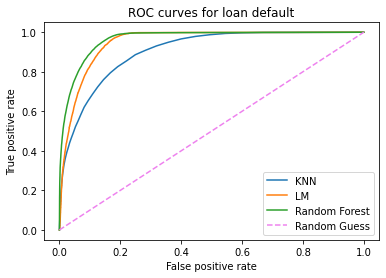

In [205]:
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_lm, tpr_lm)
plt.plot(fpr_rf, tpr_rf)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['KNN', 'LM', 'Random Forest', 'Random Guess'])
plt.title('ROC curves for loan default')
plt.savefig('ROC_curves.png', facecolor='w', edgecolor='w', dpi=200, bbox_inches='tight');
print("ROC AUC score (KNN) = ", roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1]))
print("ROC AUC score (LM) = ", roc_auc_score(y_test, lm.predict_proba(X_test_scaled)[:,1]))
print("ROC AUC score (random forest) = ", roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1]))

In [208]:
mask = (smaller_df['last_pymnt_amnt'] > 0) & (smaller_df['loan_status'] == 1)
smaller_df[mask]

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,...,tot_cur_bal,home_ownership,last_pymnt_amnt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,30000.0,0.0,0.0,1.00,5.0,59.83,15.27,1.0,3.0,0.0,...,NaN,0.0,119.66,1,0,1,0,0,0,0
8,40000.0,0.0,0.0,5.55,2.0,152.39,21.28,1.0,11.0,0.0,...,NaN,1.0,152.39,1,0,0,0,0,1,0
9,15000.0,0.0,0.0,18.08,0.0,121.45,12.69,1.0,2.0,0.0,...,NaN,0.0,121.45,1,1,0,0,0,0,0
12,30000.0,0.0,0.0,10.08,1.0,305.38,13.49,1.0,4.0,0.0,...,NaN,0.0,305.38,0,0,1,0,0,0,0
14,100000.0,0.0,0.0,7.06,2.0,325.74,10.65,1.0,14.0,0.0,...,NaN,0.0,325.74,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887303,42000.0,0.0,1.0,26.74,0.0,432.99,17.86,1.0,7.0,0.0,...,51882.0,0.0,432.99,0,0,0,1,0,0,0
887308,47784.0,0.0,1.0,14.69,1.0,98.33,17.86,1.0,10.0,1.0,...,162837.0,1.0,98.33,0,0,0,1,0,0,0
887330,69000.0,0.0,0.0,8.23,0.0,492.13,15.99,1.0,9.0,0.0,...,22279.0,1.0,492.13,0,0,0,1,0,0,0
887351,48000.0,0.0,0.0,36.93,0.0,147.64,15.99,1.0,13.0,0.0,...,207975.0,1.0,147.64,0,0,0,1,0,0,0


In [209]:
len(smaller_df[mask])

45847

In [210]:
smaller_df[smaller_df['loan_status'] == 1]

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,inq_last_6mths,installment,int_rate,loan_status,open_acc,pub_rec,...,tot_cur_bal,home_ownership,last_pymnt_amnt,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,30000.0,0.0,0.0,1.00,5.0,59.83,15.27,1.0,3.0,0.0,...,NaN,0.0,119.66,1,0,1,0,0,0,0
8,40000.0,0.0,0.0,5.55,2.0,152.39,21.28,1.0,11.0,0.0,...,NaN,1.0,152.39,1,0,0,0,0,1,0
9,15000.0,0.0,0.0,18.08,0.0,121.45,12.69,1.0,2.0,0.0,...,NaN,0.0,121.45,1,1,0,0,0,0,0
12,30000.0,0.0,0.0,10.08,1.0,305.38,13.49,1.0,4.0,0.0,...,NaN,0.0,305.38,0,0,1,0,0,0,0
14,100000.0,0.0,0.0,7.06,2.0,325.74,10.65,1.0,14.0,0.0,...,NaN,0.0,325.74,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887303,42000.0,0.0,1.0,26.74,0.0,432.99,17.86,1.0,7.0,0.0,...,51882.0,0.0,432.99,0,0,0,1,0,0,0
887308,47784.0,0.0,1.0,14.69,1.0,98.33,17.86,1.0,10.0,1.0,...,162837.0,1.0,98.33,0,0,0,1,0,0,0
887330,69000.0,0.0,0.0,8.23,0.0,492.13,15.99,1.0,9.0,0.0,...,22279.0,1.0,492.13,0,0,0,1,0,0,0
887351,48000.0,0.0,0.0,36.93,0.0,147.64,15.99,1.0,13.0,0.0,...,207975.0,1.0,147.64,0,0,0,1,0,0,0


In [212]:
len(smaller_df[mask]) / len(smaller_df[smaller_df['loan_status'] == 1])

0.988529291274068

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Count'>

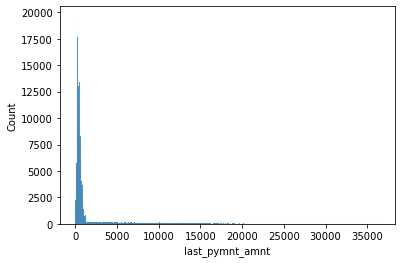

In [219]:
sns.histplot(df['last_pymnt_amnt'])

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Count'>

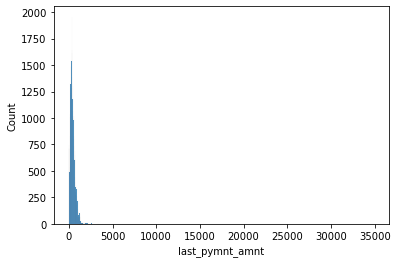

In [220]:
sns.histplot(smaller_df[smaller_df['loan_status'] == 1]['last_pymnt_amnt'])

In [222]:
smaller_df['last_pymnt_amnt'].describe()

count    253753.000000
mean       6438.304230
std        7358.646245
min           0.000000
25%         485.590000
50%        3905.750000
75%       10012.900000
max       36475.590000
Name: last_pymnt_amnt, dtype: float64

In [223]:
smaller_df[smaller_df['loan_status'] == 1]['last_pymnt_amnt'].describe()

count    46379.000000
mean       455.209577
std        650.423572
min          0.000000
25%        238.090000
50%        376.280000
75%        568.770000
max      34833.350000
Name: last_pymnt_amnt, dtype: float64

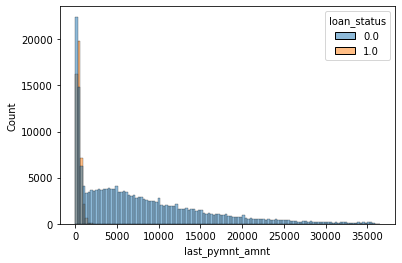

In [237]:
sns.histplot(data=smaller_df, x='last_pymnt_amnt', hue='loan_status');